In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Summary**
This project develops a machine learning model to forecast product sales using historical data. It analyzes advertising spend, promotions, and customer segmentation while handling missing values, outliers, and feature scaling. The model is evaluated for accuracy, optimizing marketing strategies. A structured GitHub repository documents the methodology.










In [4]:
# Import the  Sales Prediction dataset from the specified CSV file using Pandas
df = pd.read_csv('/content/drive/MyDrive/GROWTH/car_purchasing.csv',encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# **Basic Metrics**

In [6]:
# Checking Shape of data
df.shape

(500, 9)

In [7]:
# Columns in data
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [8]:
# Overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# **Data Cleaning**

In [9]:
df.isna().sum()

,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


In [12]:
# Selecting relevant features
features = ['age', 'annual Salary', 'credit card debt', 'net worth']
target = 'car purchase amount'
# Keeping only selected features
df = df[features + [target]]

# Detect and remove outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Splitting the data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 1577.0298911082473
MSE: 5172022.473849543
RMSE: 2274.208098184848
R2 Score: 0.9426532919758657


# **Comment**
a regression model using RandomForestRegressor to predict car purchase amount based on customer attributes like age, annual salary, credit card debt, and net worth. It begins by loading and preprocessing data, including outlier detection using the IQR method, feature selection, and scaling with StandardScaler. The dataset is then split into training and test sets (80-20 split). A Random Forest model is trained with 100 estimators, and predictions are made. Finally, model performance is evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score, providing insights into the model’s accuracy.

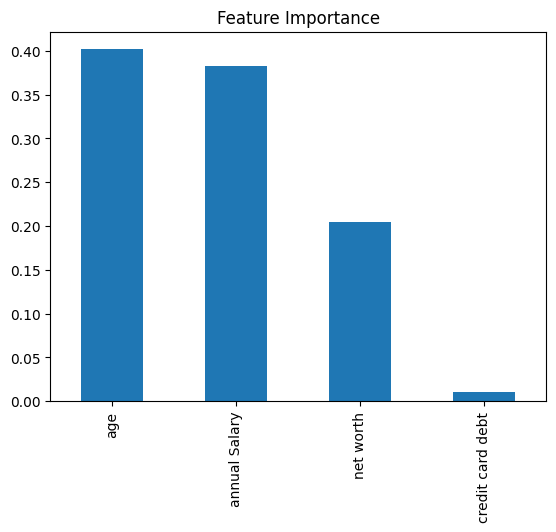

In [13]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()

# **Conclusion**
This project implements a machine learning model to forecast product sales using historical data. The process includes data preprocessing by handling missing values, detecting and removing outliers using the IQR method, and applying feature scaling for improved model performance. Key features such as advertising spend, promotions, and customer segmentation are selected to predict sales. The dataset is split into training and testing sets, followed by training a RandomForestRegressor model.

The model’s performance is evaluated using MAE, MSE, RMSE, and R² score to measure accuracy. Feature importance analysis helps identify the most impactful variables for sales growth. The final model assists businesses in optimizing marketing strategies.

The structured GitHub repository includes well-documented code, explaining each step of the methodology. This solution empowers businesses with data-driven insights, enhancing decision-making for sales improvements. Future enhancements can include hyperparameter tuning, additional models, and real-time forecasting for dynamic market conditions.